In [169]:
import aocd
from aocd.models import Puzzle
day = 24
year = 2020
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [170]:
from collections import defaultdict

In [171]:
data = puzzle.input_data.splitlines()
data[:10]

['wseseseswsesesewnesesesesewneseseswnene',
 'seswswsenenweseneesweenwswneswsenwsenw',
 'nenwneneneeneneneneseeenene',
 'swwenwseswseswwnweswswswnwwswesww',
 'nwenenwnwwswnwsewneneswnwswnwwwwsenw',
 'seswseseswsesweseswswswnw',
 'seneesweneesweweeseeseeeenese',
 'nwswnwenwnwnwnwseneswnenwneswswsenenwnenw',
 'wsewwwwwwnenwwwwwneswww',
 'wneneneneenenewneneenesenenenee']

In [172]:
len(data)

313

In [173]:
test_data = """sesenwnenenewseeswwswswwnenewsewsw
neeenesenwnwwswnenewnwwsewnenwseswesw
seswneswswsenwwnwse
nwnwneseeswswnenewneswwnewseswneseene
swweswneswnenwsewnwneneseenw
eesenwseswswnenwswnwnwsewwnwsene
sewnenenenesenwsewnenwwwse
wenwwweseeeweswwwnwwe
wsweesenenewnwwnwsenewsenwwsesesenwne
neeswseenwwswnwswswnw
nenwswwsewswnenenewsenwsenwnesesenew
enewnwewneswsewnwswenweswnenwsenwsw
sweneswneswneneenwnewenewwneswswnese
swwesenesewenwneswnwwneseswwne
enesenwswwswneneswsenwnewswseenwsese
wnwnesenesenenwwnenwsewesewsesesew
nenewswnwewswnenesenwnesewesw
eneswnwswnwsenenwnwnwwseeswneewsenese
neswnwewnwnwseenwseesewsenwsweewe
wseweeenwnesenwwwswnew"""

In [174]:
dirmap = {
    'e': (1, 0),
    'se': (0.5, -1),
    'sw': (-0.5, -1), 
    'w': (-1, 0), 
    'nw': (-0.5, 1), 
    'ne': (0.5, 1)
}

In [238]:
def parse(line):
    i = 0
    res = []
    while i < len(line):
        if line[i] in ('n', 's'):
            res.append(dirmap[line[i:i+2]])
            i += 1
        else:
            res.append(dirmap[line[i]])
        i += 1
    return res

In [247]:
instructions = list(map(parse, puzzle.input_data.splitlines()))
# instructions = list(map(parse, test_data.splitlines()))

In [248]:
tiles = defaultdict(int)

for ins in instructions:
    x = 0
    y = 0
    for step in ins:
        dx, dy = step
        x += dx
        y += dy
    tiles[(x, y)] += 1
    

In [249]:
black = sum(([val % 2 for val in tiles.values()]))
black

263

In [73]:
puzzle.answer_a = black

That's the right answer!  You are one gold star closer to saving your vacation. [Continue to Part Two]


In [188]:
# Part B

In [250]:
for coord in tiles:
    tiles[coord] = tiles[coord] % 2

In [251]:
def get_nbrs(coord):
    x, y = coord
    for _dir in dirmap.values():
        dx, dy = _dir
        yield (x+dx, y+dy)

In [252]:
def step(tiles):
    candA = set(tiles.keys())
    candB = set()
    flip2white = []
    flip2black = []
    for tile in candA:
        if tiles[tile] == 1:
            num_black_nbrs = 0
            for nbr in get_nbrs(tile):
                if tiles[nbr] == 1:
#                     print(nbr)
                    num_black_nbrs += 1
                else:
                    candB.add(nbr)
#             print(tile, num_black_nbrs)
            if num_black_nbrs == 0 or num_black_nbrs > 2:
                flip2white.append(tile)
        else:
            candB.add(tile)
                
    for tile in candB:
        if tiles[tile] == 0:
            num_black_nbrs = 0
            for nbr in get_nbrs(tile):
                if tiles[nbr] == 1:
                    num_black_nbrs += 1
                else:
                    candB.add(tile)
            if num_black_nbrs == 2:
                flip2black.append(tile)
                
#     print(candB)
#     print(flip2black)
#     print(flip2white)            
    
    new_tiles = defaultdict(int)
    for tile in flip2black:
        new_tiles[tile] = 1
    for tile in candA:
        if tile not in flip2white and tiles[tile] == 1:
            new_tiles[tile] = 1
    return new_tiles

In [253]:
tiles

defaultdict(int,
            {(4.0, -10): 1,
             (3.5, -3): 1,
             (8.0, 10): 1,
             (-5.5, -7): 1,
             (-6.5, 5): 1,
             (0.0, -10): 1,
             (11.5, -3): 1,
             (-2.0, 8): 1,
             (-12.5, 1): 1,
             (7.5, 11): 1,
             (-2.5, -7): 1,
             (1.5, 1): 1,
             (-7.0, 10): 1,
             (7.0, 0): 1,
             (-0.5, -7): 1,
             (-1.5, 9): 0,
             (2.5, -11): 1,
             (8.5, 7): 1,
             (9.0, 0): 1,
             (2.0, -12): 1,
             (-4.0, 0): 0,
             (9.0, -8): 1,
             (2.5, 3): 1,
             (5.5, -7): 1,
             (6.0, -2): 1,
             (0.0, -6): 0,
             (-3.0, -6): 1,
             (7.5, 7): 1,
             (-9.5, -5): 1,
             (-2.5, -9): 1,
             (6.5, -11): 1,
             (-7.5, -9): 1,
             (0.0, -8): 1,
             (2.5, 1): 0,
             (-1.0, 12): 0,
             (-8.5, -1): 1,
 

In [254]:
%%time
for i in range(100):
    tiles = step(tiles)

tot = sum([val == 1 for val in tiles.values()])
tot

CPU times: user 8.47 s, sys: 337 µs, total: 8.47 s
Wall time: 8.48 s


3649

In [255]:
puzzle.answer_b = tot

That's the right answer!  You are one gold star closer to saving your vacation.You have completed Day 24! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [194]:
import matplotlib.pyplot as plt

In [195]:
%matplotlib inline

3815


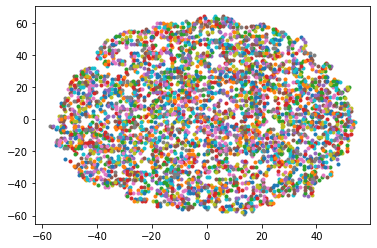

In [257]:
tiles = step(tiles)
tot=0
for coord, color in tiles.items():
    if color == 1:
        x, y = coord
        plt.plot(x, y, '.')
        tot += 1
print(tot)